In [331]:
import json as js
import pandas as pd
import numpy as np
import regex as re
import nltk
import spacy
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,LancasterStemmer
from string import punctuation
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
#from wordcloud import WordCloud
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from langdetect import detect
from googletrans import Translator
from google_trans_new import google_translator
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import metrics
from collections import defaultdict
import gensim
from gensim.models.ldamulticore import LdaMulticore
from gensim import corpora,models
import pyLDAvis.gensim
import warnings
warnings.filterwarnings('ignore')

In [332]:
data = pd.read_json('Client_data.json')
data.head()

,_index,_type,_id,_score,_source
0,complaint-public-v2,complaint,3211475,0,"{'tags': None, 'zip_code': '90301', 'complaint..."
1,complaint-public-v2,complaint,3229299,0,"{'tags': 'Servicemember', 'zip_code': '319XX',..."
2,complaint-public-v2,complaint,3199379,0,"{'tags': None, 'zip_code': '77069', 'complaint..."
3,complaint-public-v2,complaint,2673060,0,"{'tags': None, 'zip_code': '48066', 'complaint..."
4,complaint-public-v2,complaint,3203545,0,"{'tags': None, 'zip_code': '10473', 'complaint..."


In [333]:
#data['_source'].to_json('df.json')
df1 = data['_source']
df1.to_json('client_data2.json')

In [334]:
df1

0        {'tags': None, 'zip_code': '90301', 'complaint...
1        {'tags': 'Servicemember', 'zip_code': '319XX',...
2        {'tags': None, 'zip_code': '77069', 'complaint...
3        {'tags': None, 'zip_code': '48066', 'complaint...
4        {'tags': None, 'zip_code': '10473', 'complaint...
                               ...                        
78308    {'tags': None, 'zip_code': '08857', 'complaint...
78309    {'tags': None, 'zip_code': '934XX', 'complaint...
78310    {'tags': None, 'zip_code': '923XX', 'complaint...
78311    {'tags': None, 'zip_code': None, 'complaint_id...
78312    {'tags': None, 'zip_code': None, 'complaint_id...
Name: _source, Length: 78313, dtype: object

In [335]:
#data['_source'].to_csv('mdf.csv')

In [336]:
df = pd.read_json('client_data2.json')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,78303,78304,78305,78306,78307,78308,78309,78310,78311,78312
tags,None,Servicemember,None,None,None,Older American,None,None,None,None,...,Older American,None,Older American,None,None,None,None,None,None,None
zip_code,90301,319XX,77069,48066,10473,48227,76262,07753,60621,99354,...,281XX,76107,863XX,11217,074XX,08857,934XX,923XX,None,None
complaint_id,3211475,3229299,3199379,2673060,3203545,3275312,3238804,3249272,3351653,3273612,...,3094545,3080086,3103013,3099437,3156336,3105617,3091984,3133355,3110963,2001189
issue,Attempts to collect debt not owed,Written notification about debt,"Other features, terms, or problems",Trouble during payment process,Fees or interest,Managing an account,Managing an account,Trouble during payment process,Closing an account,Managing an account,...,"Advertising and marketing, including promotion...",Applying for a mortgage or refinancing an exis...,Closing an account,Managing an account,Applying for a mortgage or refinancing an exis...,Closing an account,"Other features, terms, or problems",Problem with a lender or other company chargin...,"Other features, terms, or problems",Payment to acct not credited
date_received,2019-04-13T12:00:00-05:00,2019-05-01T12:00:00-05:00,2019-04-02T12:00:00-05:00,2017-09-13T12:00:00-05:00,2019-04-05T12:00:00-05:00,2019-06-13T12:00:00-05:00,2019-05-10T12:00:00-05:00,2019-05-15T12:00:00-05:00,2019-08-22T12:00:00-05:00,2019-06-11T12:00:00-05:00,...,2018-12-07T12:00:00-05:00,2018-11-22T12:00:00-05:00,2018-12-17T12:00:00-05:00,2018-12-12T12:00:00-05:00,2019-02-19T12:00:00-05:00,2018-12-20T12:00:00-05:00,2018-12-05T12:00:00-05:00,2019-01-25T12:00:00-05:00,2018-12-27T12:00:00-05:00,2016-07-06T12:00:00-05:00


In [337]:
df = df.T
df.head()

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A


In [338]:
z =''
len(df['complaint_what_happened'].loc[(df['complaint_what_happened']) == z])

57241

In [339]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   _index   78313 non-null  object
 1   _type    78313 non-null  object
 2   _id      78313 non-null  int64 
 3   _score   78313 non-null  int64 
 4   _source  78313 non-null  object
dtypes: int64(2), object(3)
memory usage: 3.0+ MB


In [340]:
data['_type'].value_counts()

complaint    78313
Name: _type, dtype: int64

In [341]:
data['_index'].value_counts()

complaint-public-v2    78313
Name: _index, dtype: int64

In [342]:
data['_score'].value_counts()

0    78313
Name: _score, dtype: int64

In [343]:
a = data['_source'][0]
string=''
for i in a.items():
    string= string + ' ' + str(i)
string.replace('(','').replace(')','').replace(',','').replace("'",'').replace('\\n','')

' tags None zip_code 90301 complaint_id 3211475 issue Attempts to collect debt not owed date_received 2019-04-13T12:00:00-05:00 state CA consumer_disputed N/A product Debt collection company_response Closed with explanation company JPMORGAN CHASE & CO. submitted_via Web date_sent_to_company 2019-04-13T12:00:00-05:00 company_public_response None sub_product Credit card debt timely Yes complaint_what_happened  sub_issue Debt is not yours consumer_consent_provided Consent not provided'

In [344]:
df.head(10)

,tags,zip_code,complaint_id,issue,date_received,state,consumer_disputed,product,company_response,company,submitted_via,date_sent_to_company,company_public_response,sub_product,timely,complaint_what_happened,sub_issue,consumer_consent_provided
0,None,90301,3211475,Attempts to collect debt not owed,2019-04-13T12:00:00-05:00,CA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-13T12:00:00-05:00,None,Credit card debt,Yes,,Debt is not yours,Consent not provided
1,Servicemember,319XX,3229299,Written notification about debt,2019-05-01T12:00:00-05:00,GA,N/A,Debt collection,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-05-01T12:00:00-05:00,None,Credit card debt,Yes,Good morning my name is XXXX XXXX and I apprec...,Didn't receive enough information to verify debt,Consent provided
2,None,77069,3199379,"Other features, terms, or problems",2019-04-02T12:00:00-05:00,TX,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Web,2019-04-02T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,I upgraded my XXXX XXXX card in XX/XX/2018 and...,Problem with rewards from credit card,Consent provided
3,None,48066,2673060,Trouble during payment process,2017-09-13T12:00:00-05:00,MI,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Web,2017-09-14T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,Consent not provided
4,None,10473,3203545,Fees or interest,2019-04-05T12:00:00-05:00,NY,N/A,Credit card or prepaid card,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-04-05T12:00:00-05:00,None,General-purpose credit card or charge card,Yes,,Charged too much interest,N/A
5,Older American,48227,3275312,Managing an account,2019-06-13T12:00:00-05:00,MI,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-14T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
6,None,76262,3238804,Managing an account,2019-05-10T12:00:00-05:00,TX,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Phone,2019-05-10T12:00:00-05:00,None,Checking account,Yes,,Problem using a debit or ATM card,N/A
7,None,07753,3249272,Trouble during payment process,2019-05-15T12:00:00-05:00,NJ,N/A,Mortgage,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-05-21T12:00:00-05:00,None,Conventional home mortgage,Yes,,None,N/A
8,None,60621,3351653,Closing an account,2019-08-22T12:00:00-05:00,IL,N/A,Checking or savings account,Closed with explanation,JPMORGAN CHASE & CO.,Referral,2019-08-23T12:00:00-05:00,None,Checking account,Yes,,Company closed your account,N/A
9,None,99354,3273612,Managing an account,2019-06-11T12:00:00-05:00,WA,N/A,Checking or savings account,Closed with monetary relief,JPMORGAN CHASE & CO.,Referral,2019-06-17T12:00:00-05:00,None,Checking account,Yes,,Cashing a check,N/A


In [345]:
df.shape

(78313, 18)

In [346]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78313 entries, 0 to 78312
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   tags                       10900 non-null  object
 1   zip_code                   71556 non-null  object
 2   complaint_id               78313 non-null  object
 3   issue                      78313 non-null  object
 4   date_received              78313 non-null  object
 5   state                      76322 non-null  object
 6   consumer_disputed          78313 non-null  object
 7   product                    78313 non-null  object
 8   company_response           78313 non-null  object
 9   company                    78313 non-null  object
 10  submitted_via              78313 non-null  object
 11  date_sent_to_company       78313 non-null  object
 12  company_public_response    4 non-null      object
 13  sub_product                67742 non-null  object
 14  timely

In [347]:
df.isnull().sum()

tags                         67413
zip_code                      6757
complaint_id                     0
issue                            0
date_received                    0
state                         1991
consumer_disputed                0
product                          0
company_response                 0
company                          0
submitted_via                    0
date_sent_to_company             0
company_public_response      78309
sub_product                  10571
timely                           0
complaint_what_happened          0
sub_issue                    46297
consumer_consent_provided     1008
dtype: int64

In [348]:
x =''
len(df['complaint_what_happened'].loc[(df['complaint_what_happened']) == x])

57241

In [349]:
78313-57241

21072

In [350]:
x =''
len(df['complaint_what_happened'].loc[(df['complaint_what_happened']) != x])

21072

In [351]:
df['complaint_what_happened'][2]

'I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX   changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.'

In [352]:
df.groupby('complaint_what_happened').get_group('').index

Int64Index([    0,     3,     4,     5,     6,     7,     8,     9,    12,
               13,
            ...
            78292, 78298, 78299, 78300, 78302, 78304, 78305, 78306, 78307,
            78308],
           dtype='int64', length=57241)

In [353]:
def data1(df3,data4):
    df=(df3.drop(df3.groupby(data4).get_group('').index,axis=0))
    return df

In [354]:
df = data1(df,df['complaint_what_happened'])

In [355]:
df.reset_index(drop=True,inplace=True)

In [356]:
df.shape

(21072, 18)

<AxesSubplot:>

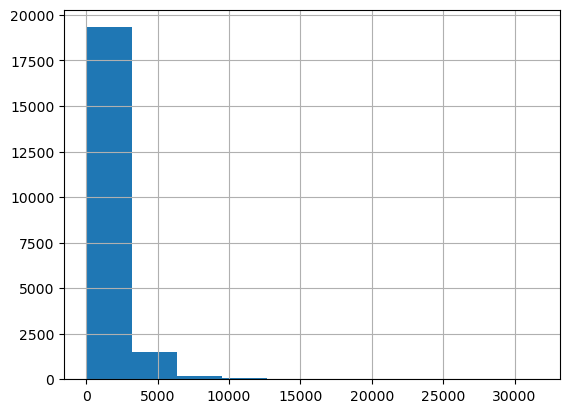

In [357]:
df['complaint_what_happened'].str.len().hist()

<AxesSubplot:>

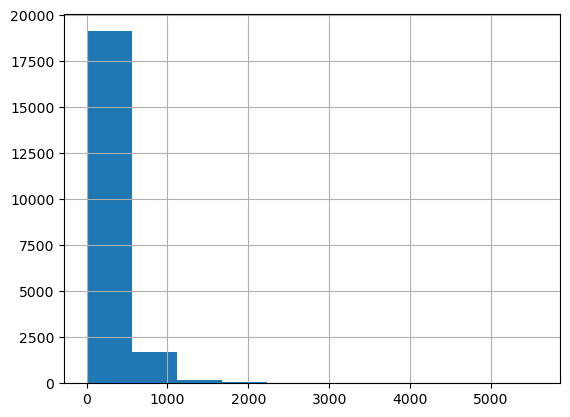

In [358]:
df['complaint_what_happened'].str.split().map(lambda x: len(x)).hist()

In [359]:
corpus=[]
new= df['complaint_what_happened'].str.split()
new=new.values.tolist()
corpus=[word for i in new for word in i]
stop = stopwords.words('english')
dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1
corpus

['Good',
 'morning',
 'my',
 'name',
 'is',
 'XXXX',
 'XXXX',
 'and',
 'I',
 'appreciate',
 'it',
 'if',
 'you',
 'could',
 'help',
 'me',
 'put',
 'a',
 'stop',
 'to',
 'Chase',
 'Bank',
 'cardmember',
 'services.',
 'In',
 '2018',
 'I',
 'wrote',
 'to',
 'Chase',
 'asking',
 'for',
 'debt',
 'verification',
 'and',
 'what',
 'they',
 'sent',
 'me',
 'a',
 'statement',
 'which',
 'is',
 'not',
 'acceptable.',
 'I',
 'am',
 'asking',
 'the',
 'bank',
 'to',
 'validate',
 'the',
 'debt.',
 'Instead',
 'I',
 'been',
 'receiving',
 'mail',
 'every',
 'month',
 'from',
 'them',
 'attempting',
 'to',
 'collect',
 'a',
 'debt.',
 'I',
 'have',
 'a',
 'right',
 'to',
 'know',
 'this',
 'information',
 'as',
 'a',
 'consumer.',
 'Chase',
 'account',
 '#',
 'XXXX',
 'XXXX',
 'XXXX',
 'XXXX',
 'Thanks',
 'in',
 'advance',
 'for',
 'your',
 'help.',
 'I',
 'upgraded',
 'my',
 'XXXX',
 'XXXX',
 'card',
 'in',
 'XX/XX/2018',
 'and',
 'was',
 'told',
 'by',
 'the',
 'agent',
 'who',
 'did',
 'the',


<function matplotlib.pyplot.show(close=None, block=None)>

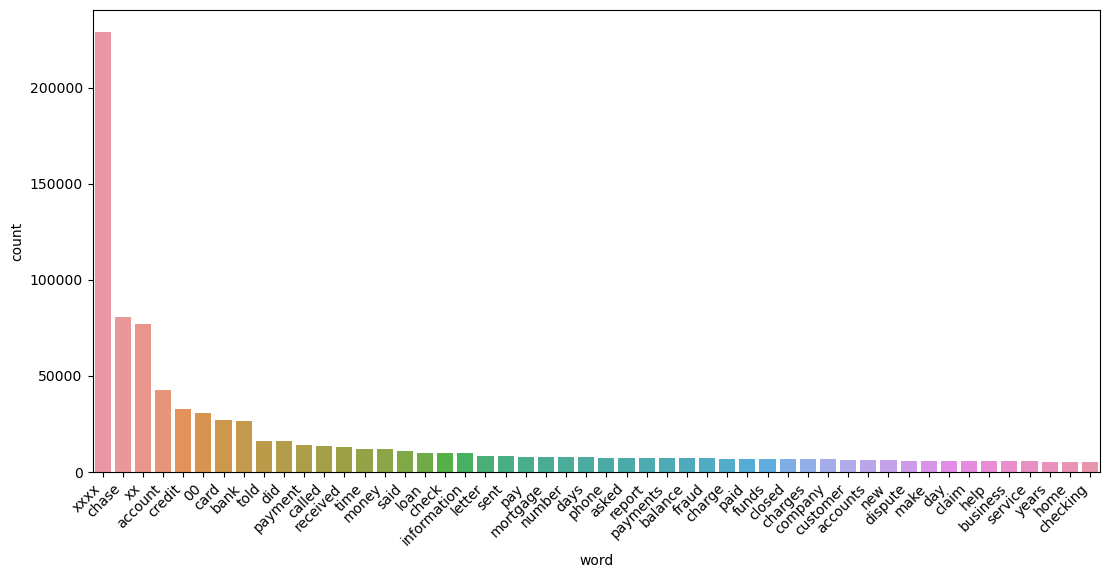

In [360]:
# EDA : Ngram
# unigram visualization
def get_ngrams(df,n=None):
  cv = CountVectorizer(stop_words='english')
  vectors = cv.fit_transform(df)
  sum_of_words= vectors.sum(axis=0)
  word_freq= [(word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()]
  word_freq = sorted(word_freq,key = lambda x: x[1],reverse=True)
  return word_freq[:n]

common_words= get_ngrams(df.complaint_what_happened,50)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax=plt.subplots(figsize=(13,6))
fig=sns.barplot(x='word',y='count',data=df_ngrams,ax=ax)
ax.set_xticklabels(labels=df_ngrams['word'],rotation=45,ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

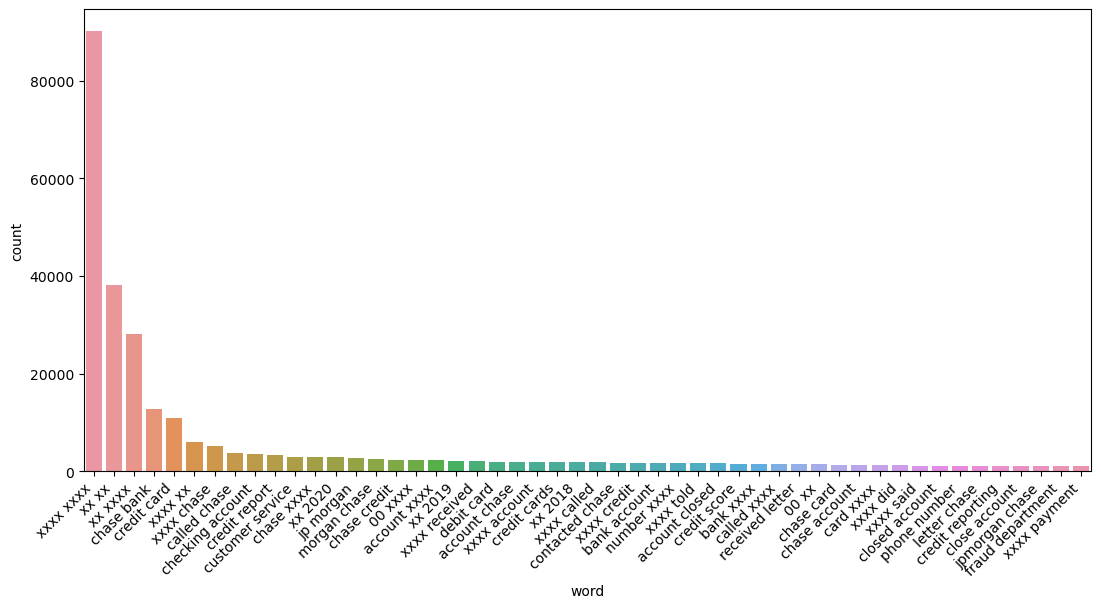

In [361]:
# bigram visualization
def get_ngrams(df,n=None):
  cv = CountVectorizer(stop_words='english',ngram_range=(2,2))
  vectors = cv.fit_transform(df)
  sum_of_words= vectors.sum(axis=0)
  word_freq= [(word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()]
  word_freq = sorted(word_freq,key = lambda x: x[1],reverse=True)
  return word_freq[:n]

common_words= get_ngrams(df.complaint_what_happened,50)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax=plt.subplots(figsize=(13,6))
fig=sns.barplot(x='word',y='count',data=df_ngrams,ax=ax)
ax.set_xticklabels(labels=df_ngrams['word'],rotation=45,ha='right')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

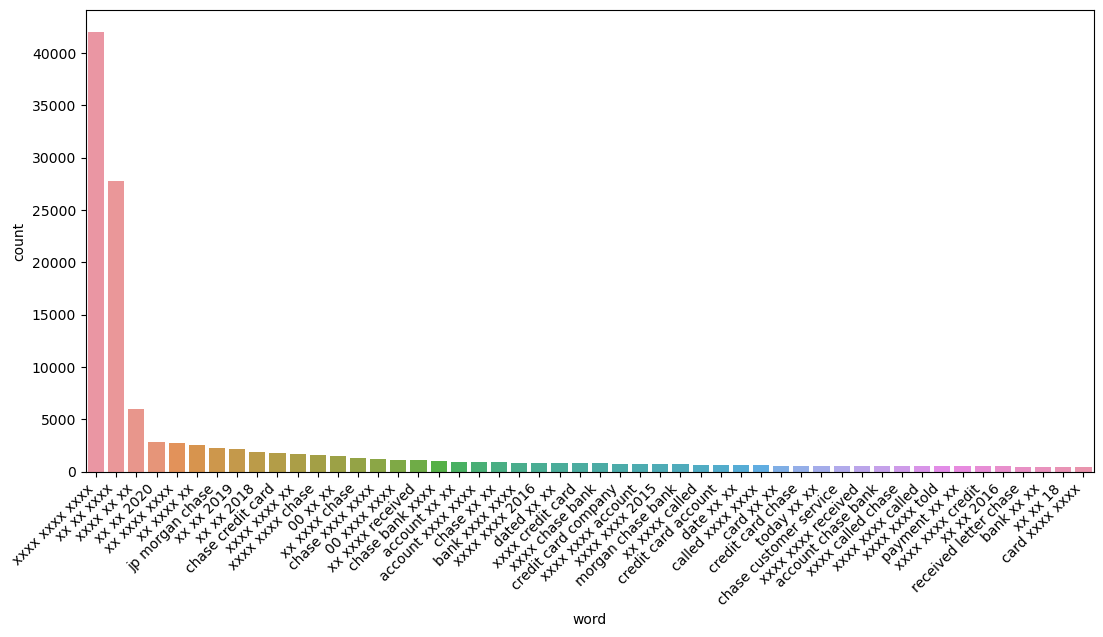

In [362]:
# triigrams 
def get_ngrams(df,n=None):
  cv = CountVectorizer(stop_words='english',ngram_range=(3,3))
  vectors = cv.fit_transform(df)
  sum_of_words= vectors.sum(axis=0)
  word_freq= [(word,sum_of_words[0,i]) for word,i in cv.vocabulary_.items()]
  word_freq = sorted(word_freq,key = lambda x: x[1],reverse=True)
  return word_freq[:n]

common_words= get_ngrams(df.complaint_what_happened,50)
df_ngrams = pd.DataFrame(common_words,columns=['word','count'])
fig,ax=plt.subplots(figsize=(13,6))
fig=sns.barplot(x='word',y='count',data=df_ngrams,ax=ax)
ax.set_xticklabels(labels=df_ngrams['word'],rotation=45,ha='right')
plt.show

In [363]:
# language detection
def detect_lang(h):
  lang=detect(h)
  return lang
detect_lang(df.complaint_what_happened[3]) 

'en'

In [364]:
df['lang'] = df['complaint_what_happened'].apply(detect_lang)

In [365]:
len(df['lang'])

21072

In [366]:
df[['complaint_what_happened','lang']]

,complaint_what_happened,lang
0,Good morning my name is XXXX XXXX and I apprec...,en
1,I upgraded my XXXX XXXX card in XX/XX/2018 and...,en
2,Chase Card was reported on XX/XX/2019. However...,en
3,"On XX/XX/2018, while trying to book a XXXX XX...",en
4,my grand son give me check for {$1600.00} i de...,en
...,...,...
21067,After being a Chase Card customer for well ove...,en
21068,"On Wednesday, XX/XX/XXXX I called Chas, my XXX...",en
21069,I am not familiar with XXXX pay and did not un...,en
21070,I have had flawless credit for 30 yrs. I've ha...,en


In [367]:
df['lang'].unique()

array(['en', 'so', 'ca', 'ro', 'fr', 'vi', 'no', 'nl', 'pt', 'it', 'es'],
      dtype=object)

In [368]:
df['lang'].value_counts()

en    20986
so       34
ca       34
vi        5
ro        4
es        3
fr        2
no        1
nl        1
pt        1
it        1
Name: lang, dtype: int64

In [369]:
for i in df['lang']:
    print(i.index)

<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 0x000001728D10E4F0>
<built-in method index of str object at 

In [370]:
df['lang'][1804]

'en'

In [371]:
len(df['complaint_what_happened'][0])

486

In [372]:
# # language transletion
# def lang_trans(g):
#   translator = Translator()
#   trans = translator.translate(g,dest='en')
#   return trans.text

In [373]:
#lang_trans(df.complaint_what_happened[40])

In [374]:
#df['complaint_what_happened'] = df['complaint_what_happened'].apply(lang_trans)

In [375]:
# Text cleaning
# 1 Tokenization
def tokenization (data):
  tokens = word_tokenize(data)
  return tokens

In [376]:
df['complaint_what_happened'] = df['complaint_what_happened'].apply(tokenization)

In [377]:
df['complaint_what_happened'][0]

['Good',
 'morning',
 'my',
 'name',
 'is',
 'XXXX',
 'XXXX',
 'and',
 'I',
 'appreciate',
 'it',
 'if',
 'you',
 'could',
 'help',
 'me',
 'put',
 'a',
 'stop',
 'to',
 'Chase',
 'Bank',
 'cardmember',
 'services',
 '.',
 'In',
 '2018',
 'I',
 'wrote',
 'to',
 'Chase',
 'asking',
 'for',
 'debt',
 'verification',
 'and',
 'what',
 'they',
 'sent',
 'me',
 'a',
 'statement',
 'which',
 'is',
 'not',
 'acceptable',
 '.',
 'I',
 'am',
 'asking',
 'the',
 'bank',
 'to',
 'validate',
 'the',
 'debt',
 '.',
 'Instead',
 'I',
 'been',
 'receiving',
 'mail',
 'every',
 'month',
 'from',
 'them',
 'attempting',
 'to',
 'collect',
 'a',
 'debt',
 '.',
 'I',
 'have',
 'a',
 'right',
 'to',
 'know',
 'this',
 'information',
 'as',
 'a',
 'consumer',
 '.',
 'Chase',
 'account',
 '#',
 'XXXX',
 'XXXX',
 'XXXX',
 'XXXX',
 'Thanks',
 'in',
 'advance',
 'for',
 'your',
 'help',
 '.']

In [378]:
# 2 Cleaning
def data_clean(data):
  clean = [i for i in data if (i not in punctuation) and (i.isalpha()) and (len(i)>=2) and (i not in 'XXXX')]
  return clean

In [379]:
df['complaint_what_happened'] = df['complaint_what_happened'].apply(data_clean)

In [380]:
df['complaint_what_happened'][7]

['During',
 'the',
 'summer',
 'months',
 'experience',
 'decline',
 'income',
 'due',
 'to',
 'my',
 'employment',
 'Therefore',
 'request',
 'one',
 'month',
 'payment',
 'extension',
 'with',
 'my',
 'Auto',
 'Loan',
 'Company',
 'Chase',
 'For',
 'the',
 'past',
 'almost',
 'fours',
 'years',
 'my',
 'request',
 'for',
 'payment',
 'extension',
 'is',
 'granted',
 'have',
 'never',
 'been',
 'delinquent',
 'with',
 'my',
 'auto',
 'loan',
 'payment',
 'However',
 'On',
 'my',
 'request',
 'for',
 'one',
 'month',
 'payment',
 'extension',
 'was',
 'denied',
 'this',
 'year',
 'explained',
 'my',
 'situation',
 'to',
 'representative',
 'and',
 'the',
 'supervisor',
 'with',
 'no',
 'avail',
 'After',
 'lengthy',
 'discussion',
 'and',
 'waiting',
 'was',
 'informed',
 'the',
 'reason',
 'for',
 'the',
 'decline',
 'as',
 'it',
 'is',
 'not',
 'contractual',
 'This',
 'reason',
 'for',
 'denial',
 'baffled',
 'me',
 'and',
 'therefore',
 'emailed',
 'the',
 'office',
 'of',
 'Execut

In [381]:
# 3 Normalization
def lower_c(data):
  lower = [i.lower() for i in data]
  return lower

In [382]:
df['complaint_what_happened'] = df['complaint_what_happened'].apply(lower_c)

In [383]:
df['complaint_what_happened'][6]

['with',
 'out',
 'notice',
 'morgan',
 'chase',
 'restricted',
 'my',
 'account',
 'by',
 'my',
 'debit',
 'card',
 'tuesday',
 'on',
 'thursday',
 'went',
 'into',
 'branch',
 'after',
 'being',
 'advised',
 'by',
 'customer',
 'service',
 'representative',
 'that',
 'my',
 'account',
 'would',
 'actually',
 'be',
 'closed',
 'went',
 'into',
 'the',
 'branch',
 'to',
 'see',
 'how',
 'can',
 'remove',
 'the',
 'funds',
 'that',
 'are',
 'in',
 'there',
 'currently',
 'in',
 'as',
 'well',
 'as',
 'if',
 'my',
 'direct',
 'deposit',
 'from',
 'my',
 'place',
 'of',
 'employment',
 'would',
 'be',
 'returned',
 'the',
 'bank',
 'associate',
 'and',
 'the',
 'customer',
 'service',
 'representative',
 'assured',
 'me',
 'that',
 'the',
 'funds',
 'would',
 'post',
 'but',
 'they',
 'may',
 'take',
 'an',
 'additional',
 'business',
 'day',
 'that',
 'saturday',
 'attempted',
 'to',
 'go',
 'inside',
 'of',
 'branch',
 'yet',
 'again',
 'to',
 'retrieve',
 'my',
 'funds',
 'that',
 'act

In [384]:
# 4 Stopword remover
stop = stopwords.words('english')
def stop_word(data):
  text = [i for i in data if i not in stop]
  return text

In [385]:
df['complaint_what_happened'] = df['complaint_what_happened'].apply(stop_word)

In [386]:
len(df['complaint_what_happened'][2])

19

In [387]:
df['complaint_what_happened'][2]

['chase',
 'card',
 'reported',
 'however',
 'fraudulent',
 'application',
 'submitted',
 'identity',
 'without',
 'consent',
 'fraudulently',
 'obtain',
 'services',
 'extend',
 'credit',
 'without',
 'verifying',
 'identity',
 'applicant']

In [388]:
df['complaint_what_happened'][1000]

['yesterday',
 'chase',
 'bank',
 'told',
 'chase',
 'conference',
 'call',
 'call',
 'stated',
 'numeroysly',
 'overtly',
 'use',
 'despises',
 'hated',
 'term',
 'pending',
 'pending',
 'hmmm',
 'gone',
 'period',
 'said',
 'bal',
 'aftet',
 'refund',
 'reverse',
 'already',
 'posted',
 'memo',
 'account',
 'bal',
 'today',
 'called',
 'balance',
 'evening',
 'wt',
 'know',
 'right',
 'pursuant',
 'title',
 'usc',
 'debt',
 'collecting',
 'license',
 'collect',
 'debt',
 'chase',
 'guilty',
 'chase',
 'allowed',
 'releinquishing',
 'account',
 'funds',
 'refund',
 'goods',
 'difference',
 'unaccountable',
 'account',
 'promised',
 'delivery',
 'day',
 'defrauded',
 'never',
 'stopped',
 'shipper',
 'ships',
 'ca',
 'supervisor',
 'lied',
 'hed',
 'get',
 'back',
 'chase',
 'evening',
 'call',
 'today',
 'stated',
 'saw',
 'account',
 'reverse',
 'whatsoever',
 'ccalled',
 'back',
 'double',
 'assured',
 'mom',
 'row',
 'sometime',
 'ull',
 'get',
 'helmet',
 'glasses',
 'refunding',


In [389]:
for i in df['complaint_what_happened'][1000]:
    print(i)

yesterday
chase
bank
told
chase
conference
call
call
stated
numeroysly
overtly
use
despises
hated
term
pending
pending
hmmm
gone
period
said
bal
aftet
refund
reverse
already
posted
memo
account
bal
today
called
balance
evening
wt
know
right
pursuant
title
usc
debt
collecting
license
collect
debt
chase
guilty
chase
allowed
releinquishing
account
funds
refund
goods
difference
unaccountable
account
promised
delivery
day
defrauded
never
stopped
shipper
ships
ca
supervisor
lied
hed
get
back
chase
evening
call
today
stated
saw
account
reverse
whatsoever
ccalled
back
double
assured
mom
row
sometime
ull
get
helmet
glasses
refunding
card
shipped
resteictive
blocking
ability
leave
package
fraudulently
purported
ignorant
call
stating
leave
bal
nearly
afterrrrr
complaining
raising
beef
threatening
go
cfpb
chase
reps
yup
retaliation
got
creditors
calling
mothers
number
harrassing
etc
thru
telling
debt
aqusition
creditor
sum
veguas
anyhow
chase
atm
machines
lastweek
branch
refused
money
surfferrerre

In [390]:
# 5 stemming or lemmatization
def lemmatization(data):
    lemma=WordNetLemmatizer()
    return [lemma.lemmatize(i) for i in data]

In [391]:
df['complaint_what_happened'] = df['complaint_what_happened'].apply(lemmatization)

In [392]:
type(df['complaint_what_happened'][0])

list

In [393]:
df['complaint_what_happened'][0]

['good',
 'morning',
 'name',
 'appreciate',
 'could',
 'help',
 'put',
 'stop',
 'chase',
 'bank',
 'cardmember',
 'service',
 'wrote',
 'chase',
 'asking',
 'debt',
 'verification',
 'sent',
 'statement',
 'acceptable',
 'asking',
 'bank',
 'validate',
 'debt',
 'instead',
 'receiving',
 'mail',
 'every',
 'month',
 'attempting',
 'collect',
 'debt',
 'right',
 'know',
 'information',
 'consumer',
 'chase',
 'account',
 'thanks',
 'advance',
 'help']

In [394]:
df[['complaint_what_happened']]

,complaint_what_happened
0,"[good, morning, name, appreciate, could, help,..."
1,"[upgraded, card, told, agent, upgrade, anniver..."
2,"[chase, card, reported, however, fraudulent, a..."
3,"[trying, book, ticket, came, across, offer, ap..."
4,"[grand, son, give, check, deposit, chase, acco..."
...,...
21067,"[chase, card, customer, well, decade, offered,..."
21068,"[wednesday, called, chas, visa, credit, card, ..."
21069,"[familiar, pay, understand, great, risk, provi..."
21070,"[flawless, credit, yr, chase, credit, card, ch..."


Topic modeling exploration with pyLDAvis

In [395]:
dic=gensim.corpora.Dictionary(df['complaint_what_happened'])
bow_corpus = [dic.doc2bow(doc) for doc in df['complaint_what_happened']]

In [396]:
lda_model = gensim.models.LdaMulticore(bow_corpus,
                                   num_topics = 4,
                                   id2word = dic,
                                   passes = 10,
                                   workers = 2)
lda_model.show_topics()

[(0,
  '0.037*"chase" + 0.024*"credit" + 0.013*"report" + 0.012*"account" + 0.012*"dispute" + 0.012*"information" + 0.010*"charge" + 0.010*"letter" + 0.008*"bank" + 0.008*"company"'),
 (1,
  '0.033*"chase" + 0.023*"loan" + 0.022*"payment" + 0.017*"mortgage" + 0.009*"home" + 0.009*"time" + 0.009*"would" + 0.008*"year" + 0.007*"bank" + 0.006*"month"'),
 (2,
  '0.041*"card" + 0.036*"chase" + 0.036*"credit" + 0.019*"account" + 0.016*"payment" + 0.015*"fee" + 0.011*"charge" + 0.011*"would" + 0.011*"balance" + 0.008*"time"'),
 (3,
  '0.038*"account" + 0.034*"chase" + 0.022*"bank" + 0.014*"check" + 0.013*"told" + 0.013*"money" + 0.012*"would" + 0.011*"called" + 0.010*"said" + 0.009*"back"')]

In [397]:
lda_model.get_term_topics('payment')

[(1, 0.02159866), (2, 0.016271077)]

In [398]:
lda_model.show_topics(num_topics=6)

[(0,
  '0.037*"chase" + 0.024*"credit" + 0.013*"report" + 0.012*"account" + 0.012*"dispute" + 0.012*"information" + 0.010*"charge" + 0.010*"letter" + 0.008*"bank" + 0.008*"company"'),
 (1,
  '0.033*"chase" + 0.023*"loan" + 0.022*"payment" + 0.017*"mortgage" + 0.009*"home" + 0.009*"time" + 0.009*"would" + 0.008*"year" + 0.007*"bank" + 0.006*"month"'),
 (2,
  '0.041*"card" + 0.036*"chase" + 0.036*"credit" + 0.019*"account" + 0.016*"payment" + 0.015*"fee" + 0.011*"charge" + 0.011*"would" + 0.011*"balance" + 0.008*"time"'),
 (3,
  '0.038*"account" + 0.034*"chase" + 0.022*"bank" + 0.014*"check" + 0.013*"told" + 0.013*"money" + 0.012*"would" + 0.011*"called" + 0.010*"said" + 0.009*"back"')]

In [399]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, bow_corpus, dic)
vis

AttributeError: 'DataFrame' object has no attribute 'ix'

In [400]:
def join1(data):
    n = ' '.join(data)
    return n

In [401]:
df['complaint_what_happened'] = df['complaint_what_happened'].apply(join1)


In [402]:
df['complaint_what_happened']

0        good morning name appreciate could help put st...
1        upgraded card told agent upgrade anniversary d...
2        chase card reported however fraudulent applica...
3        trying book ticket came across offer applied t...
4        grand son give check deposit chase account fun...
                               ...                        
21067    chase card customer well decade offered multip...
21068    wednesday called chas visa credit card provide...
21069    familiar pay understand great risk provides co...
21070    flawless credit yr chase credit card chase fre...
21071    roughly year ago closed account jp morgan chas...
Name: complaint_what_happened, Length: 21072, dtype: object

In [403]:
x = [dic.doc2bow(doc) for doc in df['complaint_what_happened']]
x

TypeError: doc2bow expects an array of unicode tokens on input, not a single string

In [404]:
vectorizer = TfidfVectorizer(stop_words='english',max_features=4000)
x = vectorizer.fit_transform(df['complaint_what_happened']).toarray()

In [405]:
a = pd.DataFrame(x)

In [406]:
a

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
21068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
21069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
21070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.091697,0.0,0.0,0.0


In [407]:
x.shape

(21072, 4000)

In [408]:
label_encoder = preprocessing.LabelEncoder()
df['product']=label_encoder.fit_transform(df['product'])

In [409]:
df['product'].unique()

array([ 7,  4,  6,  1, 16,  8, 10, 15,  2, 13,  0,  3,  5,  9, 14, 11, 12])

In [410]:
model = KMeans(n_clusters=4)
model.fit(x)
labels = model.labels_
Kmeans = pd.DataFrame(list(zip(df['complaint_what_happened'],labels)),columns =['text','cluster'])
Kmeans.head(10)

,text,cluster
0,good morning name appreciate could help put st...,0
1,upgraded card told agent upgrade anniversary d...,0
2,chase card reported however fraudulent applica...,3
3,trying book ticket came across offer applied t...,3
4,grand son give check deposit chase account fun...,1
5,please remove inquiry,3
6,notice morgan chase restricted account debit c...,1
7,summer month experience decline income due emp...,2
8,made payment online retailer using chase quick...,0
9,chase credit card incorrectly reporting data c...,3


In [411]:
maindf =  pd.concat([a, df[['product']],Kmeans[['cluster']]], axis=1)

In [412]:
maindf.head()

,0,1,2,3,4,5,6,7,8,9,...,3992,3993,3994,3995,3996,3997,3998,3999,product,cluster
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101322,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6,3
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [413]:
maindf.shape

(21072, 4002)

In [414]:
x = maindf.drop(['cluster'],axis=1)
y = maindf['cluster']

In [415]:
x

,0,1,2,3,4,5,6,7,8,9,...,3991,3992,3993,3994,3995,3996,3997,3998,3999,product
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,7
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,6
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.101322,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,6
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21067,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4
21068,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,4
21069,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
21070,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.091697,0.0,0.0,0.0,4


In [416]:
y

0        0
1        0
2        3
3        3
4        1
        ..
21067    3
21068    0
21069    0
21070    2
21071    2
Name: cluster, Length: 21072, dtype: int32

In [417]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=47)

In [418]:
model1 = RandomForestClassifier(max_depth=17)

In [419]:
model1.fit(x_train,y_train)

RandomForestClassifier(max_depth=17)

In [420]:
y_pred = model1.predict(x_test)

In [421]:
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

ACCURACY OF THE MODEL:  0.8500379650721336


In [422]:
print("classification_report: ",metrics.classification_report(y_test, y_pred))

classification_report:                precision    recall  f1-score   support

           0       0.77      0.92      0.84      1915
           1       0.91      0.86      0.88      1281
           2       0.89      0.83      0.86      1104
           3       0.95      0.71      0.82       968

    accuracy                           0.85      5268
   macro avg       0.88      0.83      0.85      5268
weighted avg       0.86      0.85      0.85      5268



In [423]:
print("confusion_matrix: ",metrics.confusion_matrix(y_test, y_pred))

confusion_matrix:  [[1760   67   84    4]
 [ 153 1107   11   10]
 [ 136   26  920   22]
 [ 234   23   20  691]]
